# Reproducibility showcase using a single framework (R)

Here we simulate running the code that Andrea sent us using our computer

In [1]:
run_analysis <- function() {

  # file pointers
  decoupler_input_file <- "https://filedn.eu/ld7S7VEWtgOf5uN0V7fbp84/decoupler_input.tsv"
  progeny_interactions_file <- "https://filedn.eu/ld7S7VEWtgOf5uN0V7fbp84/progeny_interactions.tsv"

  # read input files
  decoupler_input <- read_tsv(decoupler_input_file) %>%
    column_to_rownames("gene") %>%
    as.matrix()
  progeny_interactions <- read_tsv(progeny_interactions_file)

  # perform analysis
  progeny_results <- run_wmean(
    mat = decoupler_input,
    network = progeny_interactions,
    times = 10,
    .source = "pathway",
    .target = "target",
    .mor = "mor",
    seed = sample(1:100, 1),
    .likelihood = "likelihood"
  ) %>%
    subset(statistic == "norm_wmean") %>%
    dplyr::mutate(adj_p = p.adjust(p_value, method = "BH"))

  # adjust size of resulting plot
  options(repr.plot.width=8, repr.plot.height=8)

  # plot results
  progeny_results %>%
    dplyr::mutate(status = ifelse(score > 0, "Up", "Down")) %>%
    dplyr::arrange(p_value) %>%
    dplyr::group_by(status) %>%
    dplyr::slice_head(n = 10) %>%
    dplyr::arrange(score) %>%
    dplyr::mutate(source = forcats::fct_inorder(source)) %>%
    ggplot2::ggplot(aes(x = score, y = source, fill = status)) +
    ggplot2::geom_bar(stat = "identity") +
    ggplot2::scale_fill_manual(values = c("Up" = "red", "Down" = "blue")) +
    theme(axis.text = element_text(color = "black", size = 10))

}

run_analysis()

ERROR: ignored

.

.

.

.

.

.

.

.

.

.

.

.

.

## Installing dependencies...

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: usethis

Loading required package: decoupleR

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘decoupleR’”



rlang        (1.0.0 -> 1.0.1) [CRAN]
crayon       (1.4.2 -> 1.5.0) [CRAN]
cli          (3.1.1 -> 3.2.0) [CRAN]
pillar       (1.6.5 -> 1.7.0) [CRAN]
generics     (0.1.1 -> 0.1.2) [CRAN]
dplyr        (1.0.7 -> 1.0.8) [CRAN]
tidyr        (1.1.4 -> 1.2.0) [CRAN]
RobustRan... (NA    -> 1.1  ) [CRAN]


Installing 8 packages: rlang, crayon, cli, pillar, generics, dplyr, tidyr, RobustRankAggreg

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpHgzzWf/remotes44547fac9d/saezlab-decoupleR-e74bdfa/DESCRIPTION’ ... OK
* preparing ‘decoupleR’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘decoupleR_2.1.6.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 13390 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): gene
dbl (1): t

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4200 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): target, pathway
dbl (3): weight, mor, likelihood

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in rename_net(., {:
“.likelihood argument is deprecated, it will be set to 1. From now
                on, weights of regulation should go into the .mor column.”


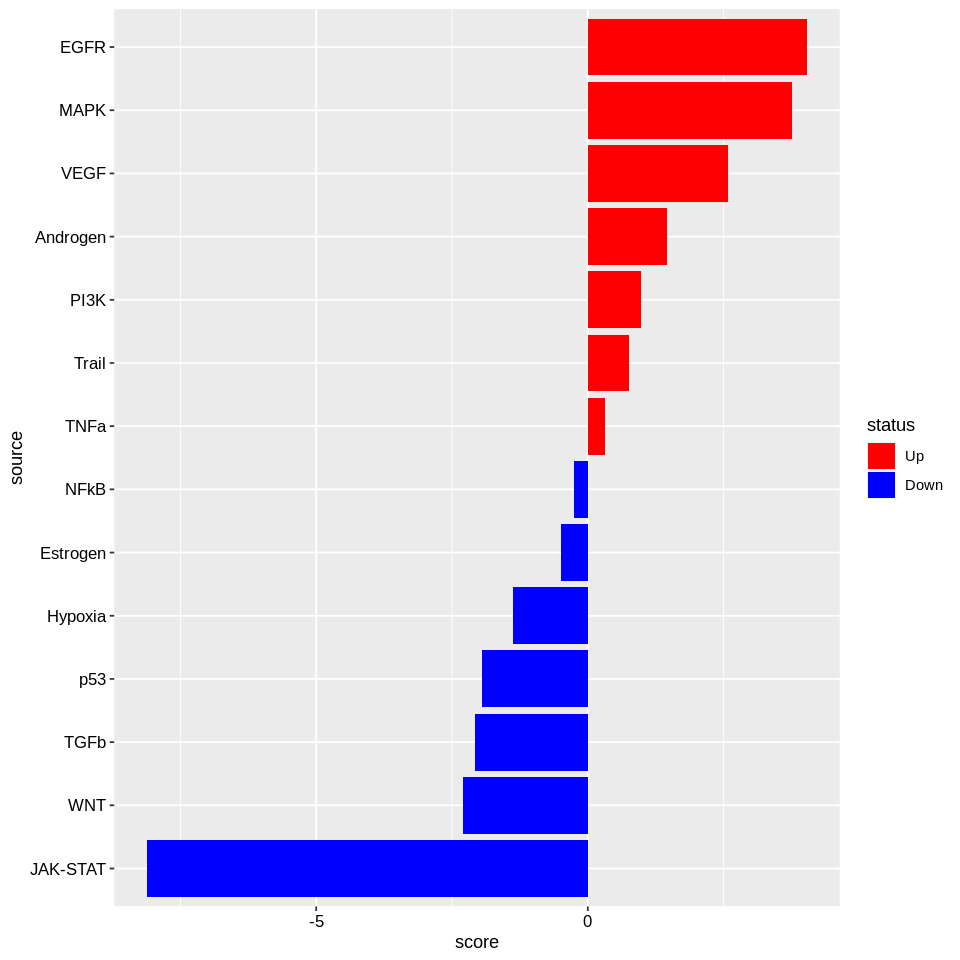

In [2]:
# install dependencies
library(tidyverse)
library(devtools)
if(!require(decoupleR)) devtools::install_github("saezlab/decoupler")
library(decoupleR)

run_analysis()

.

.

.

.

.

.

.

.

.

.

.

.

.

# How relevant is the seed in (pseudo) RNGs?

In [3]:
rng = function(seed) {

  out_number = round(((seed * 123) ^ 4 ) / 55)
  return(out_number)

}

rng(40)
rng(100)
rng(2000)

[1] 1.065363e+13

[1] 4.161575e+14

[1] 6.65852e+19

# Rerunning controlling (pseudo) RNGs

Rows: 13390 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): gene
dbl (1): t

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4200 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): target, pathway
dbl (3): weight, mor, likelihood

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in rename_net(., {:
“.likelihood argument is deprecated, it will be set to 1. From now
                on, weights of regulation should go into the .mor column.”


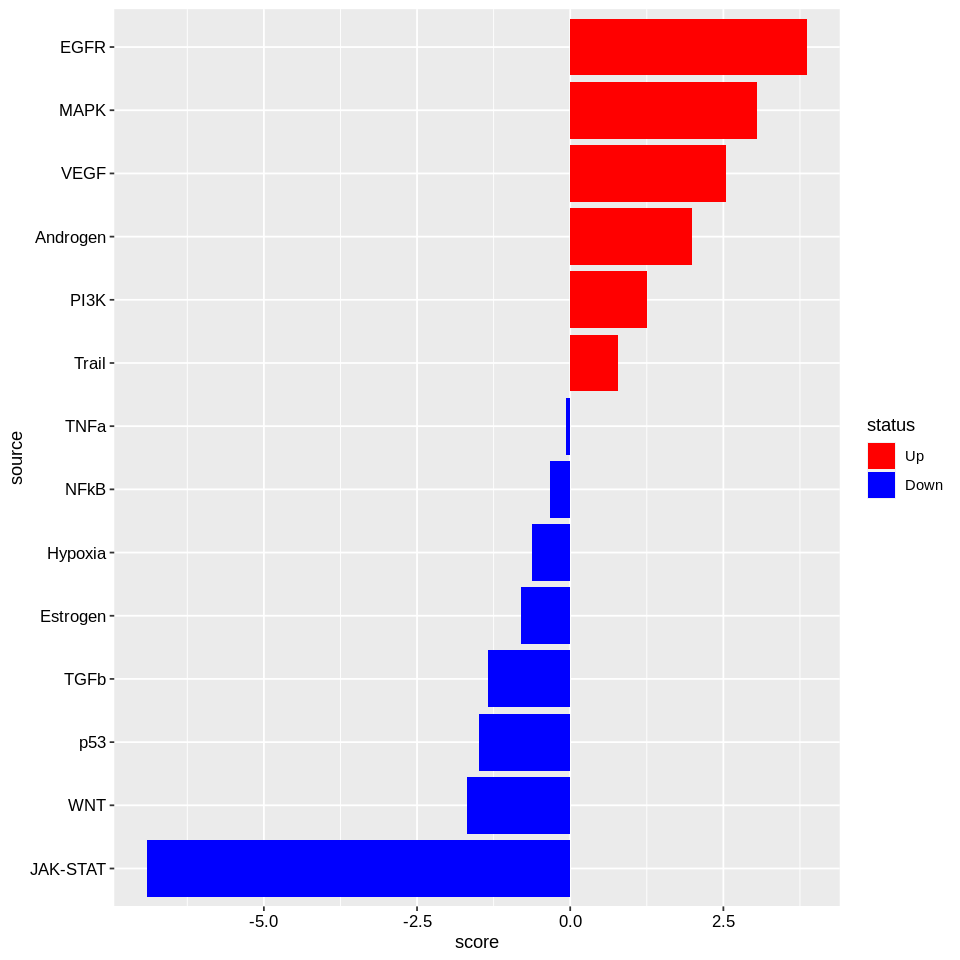

In [4]:
run_analysis <- function(n_perm = 1000, seed = 150) {

  # file pointers
  decoupler_input_file <- "https://filedn.eu/ld7S7VEWtgOf5uN0V7fbp84/decoupler_input.tsv"
  progeny_interactions_file <- "https://filedn.eu/ld7S7VEWtgOf5uN0V7fbp84/progeny_interactions.tsv"

  # read input files
  decoupler_input <- read_tsv(decoupler_input_file) %>%
    column_to_rownames("gene") %>%
    as.matrix()
  progeny_interactions <- read_tsv(progeny_interactions_file)

  # perform analysis
  progeny_results <- run_wmean(
    mat = decoupler_input,
    network = progeny_interactions,
    times = n_perm,
    .source = "pathway",
    .target = "target",
    .mor = "mor",
    seed = seed,
    .likelihood = "likelihood"
  ) %>%
    subset(statistic == "norm_wmean") %>%
    dplyr::mutate(adj_p = p.adjust(p_value, method = "BH"))

  # adjust size of resulting plot
  options(repr.plot.width=8, repr.plot.height=8)

  # plot results
  progeny_results %>%
    dplyr::mutate(status = ifelse(score > 0, "Up", "Down")) %>%
    dplyr::arrange(p_value) %>%
    dplyr::group_by(status) %>%
    dplyr::slice_head(n = 10) %>%
    dplyr::arrange(score) %>%
    dplyr::mutate(source = forcats::fct_inorder(source)) %>%
    ggplot2::ggplot(aes(x = score, y = source, fill = status)) +
    ggplot2::geom_bar(stat = "identity") +
    ggplot2::scale_fill_manual(values = c("Up" = "red", "Down" = "blue")) +
    theme(axis.text = element_text(color = "black", size = 10))

}

run_analysis()